<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/qr_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import linalg

In [2]:
import matplotlib.pyplot as plt
from pprint import pprint
#np.set_printoptions(precision=3, suppress=False)
np.set_printoptions(precision=3, suppress=True)
#np.set_printoptions(formatter={"float_kind": lambda x: "%g" % x})

In [3]:
A = np.random.randn(5,5)

In [4]:
# make A symmetric
A = (A+A.T)/2

In [5]:
A

array([[ 0.218, -0.109, -0.974, -1.243, -0.051],
       [-0.109,  0.711,  0.25 ,  0.69 ,  0.215],
       [-0.974,  0.25 , -0.118,  1.211,  0.531],
       [-1.243,  0.69 ,  1.211,  0.2  ,  0.527],
       [-0.051,  0.215,  0.531,  0.527, -0.782]])

## Calculate Hessenberg form of A

In [6]:
from scipy.linalg import hessenberg

In [7]:
A = np.random.randn(5,5)
H, Q = hessenberg(A, calc_q=True)
print(H)

[[ 0.663 -2.564 -1.278 -0.233 -0.348]
 [-1.317 -0.375  0.153 -2.281  0.276]
 [ 0.    -2.245  0.604  0.31   1.103]
 [ 0.     0.     0.904 -1.881 -0.583]
 [ 0.     0.     0.     1.705  0.155]]


In [8]:
A = np.random.randn(5,5)
H, Q = hessenberg(A+A.T, calc_q=True)
print(H)

[[ 0.066  2.821 -0.     0.     0.   ]
 [ 2.821  0.223 -1.206  0.     0.   ]
 [ 0.    -1.206 -0.075  2.242  0.   ]
 [ 0.     0.     2.242 -3.038 -0.901]
 [ 0.     0.     0.    -0.901  1.415]]


## Run QR algorithm

In [9]:
# QR algorithm
A = H
for i in range(50):
  Q,R = linalg.qr(A)
  A = R.dot(Q)

In [10]:
print(A)

[[-4.467  0.    -0.    -0.    -0.   ]
 [ 0.     3.281  0.     0.     0.   ]
 [ 0.     0.    -2.734  0.    -0.   ]
 [ 0.     0.     0.     1.734  0.   ]
 [ 0.     0.     0.    -0.     0.777]]


In [11]:
w, v = np.linalg.eig(H)

In [12]:
print(w)

[-4.467 -2.734  3.281  0.777  1.734]


In [13]:
lambda_max = w[np.argmax(np.abs(w))]
print('Largest eigenvalue: ', lambda_max)

Largest eigenvalue:  -4.466909391154745


In [14]:
print(v)

[[ 0.123  0.677 -0.614 -0.336 -0.192]
 [-0.198 -0.672 -0.699 -0.085 -0.114]
 [-0.481 -0.064  0.337 -0.746 -0.307]
 [ 0.836 -0.286  0.129 -0.329 -0.309]
 [ 0.128 -0.062 -0.062 -0.464  0.872]]


In [15]:
v@v.T

array([[ 1.,  0.,  0.,  0., -0.],
       [ 0.,  1.,  0.,  0., -0.],
       [ 0.,  0.,  1., -0.,  0.],
       [ 0.,  0., -0.,  1.,  0.],
       [-0., -0.,  0.,  0.,  1.]])

## Check convergene rate

In [113]:
w,v=np.linalg.eig(A)

In [161]:
A = np.random.randn(10,10)/np.sqrt(10)
A = A+A.T
H, Q = hessenberg(A, calc_q=True)
#print(H)

Pure QR Algorithm 

Linear convergence

In [170]:
# Pure QR algorithm
A = H
loss = []
for i in range(1000):
  Q,R = linalg.qr(A)
  A = R.dot(Q)
  diff = np.linalg.norm(A-np.diag(np.diag(A)),ord='fro')
  loss.append(diff)

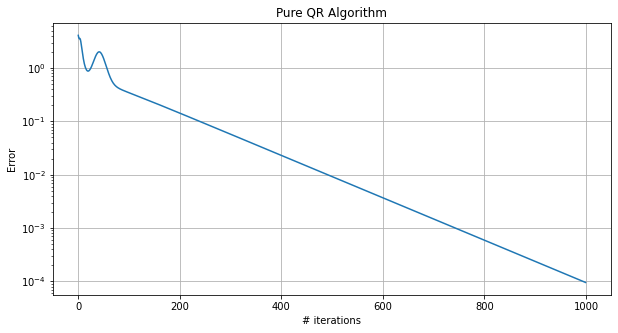

In [171]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.array(loss))
ax.set_xlabel('# iterations')
ax.set_ylabel('Error')
ax.set_yscale('log')
ax.set_title('Pure QR Algorithm')
ax.grid()

In [172]:
print('Eigenvalues: ', np.diag(A))

Eigenvalues:  [ 2.459 -2.196 -1.771 -1.431  1.3    1.146  0.614 -0.609  0.27   0.112]


## Shift QR Algorithm

In [173]:
def wilkinson_shift(B):
  # B is 2 x 2 matrix
  delta = (B[0,0]-B[1,1])/2
  mu = B[1,1] - np.sign(delta)*B[0,1]*B[0,1]/(np.abs(delta)+np.sqrt(delta*delta+B[0,1]*B[0,1]))
  return mu

In [180]:
# Shifted QR algorithm
A = H
loss = []
eps = 1e-6
eigs = []
for i in range(100):
  mu = A[-1,-1]
  #mu = wilkinson_shift(A[-2:,-2:])
  Q,R = linalg.qr(A-mu*np.identity(A.shape[0]))
  A = R.dot(Q) + mu*np.identity(A.shape[0])

  if np.abs(A[-1,-2])<eps:  # deflate, reduce to n-1 x n-1 matrix
    A = A[:-1,:-1]
    eigs.append(mu)

  if A.shape[0]<=1:
    eigs.append(A[0,0])
    break

  diff = np.linalg.norm(A-np.diag(np.diag(A)),ord='fro')
  loss.append(diff)

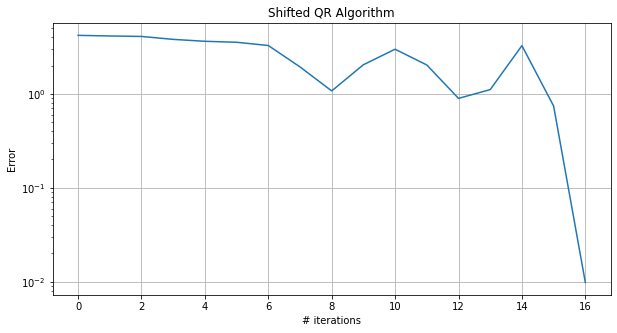

In [181]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.array(loss))
ax.set_xlabel('# iterations')
ax.set_ylabel('Error')
ax.set_yscale('log')
ax.set_title('Shifted QR Algorithm')
ax.grid()

In [159]:
print('Eigenvalues: ', np.array(eigs))

Eigenvalues:  [-0.12  -0.09  -0.041 -0.307 -0.289 -0.543 -0.408 -0.576  0.101  0.247
  0.285  0.425 -0.792 -0.75  -0.954 -1.016 -1.074 -1.18   0.617  0.702
  0.766  0.815  0.955 -1.257 -1.383 -1.453 -1.465  1.095  1.125 -1.54
  1.368  1.427  1.48   1.596  1.695  1.715  1.824 -1.813  1.938  1.89
 -1.917 -2.09   2.156  2.207 -2.221 -2.268  2.297 -2.478  2.472 -2.595]
